In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


Acurácia do modelo: 1.0
Matriz de Confusão:
[[1 0]
 [0 1]]


In [ ]:

# Dados de exemplo
horas_estudo = np.array([2, 4, 6, 8, 10, 12, 14, 16, 18, 20])
exercicios_praticados = np.array([1, 3, 2, 5, 7, 6, 8, 10, 12, 15])
cancelou_inscricao = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])  # 0 representa "não cancelou", 1 representa "cancelou"

In [ ]:
# Formate os dados para a entrada do modelo
X = np.column_stack((horas_estudo, exercicios_praticados)) # mergeia as duas colunas em uma matriz de duas colunas
y = cancelou_inscricao

In [9]:
X

array([[ 2,  1],
       [ 4,  3],
       [ 6,  2],
       [ 8,  5],
       [10,  7],
       [12,  6],
       [14,  8],
       [16, 10],
       [18, 12],
       [20, 15]])

In [ ]:

# Divida os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crie o modelo de Regressão Logística
modelo = LogisticRegression()

# Treine o modelo
modelo.fit(X_train, y_train)

# Faça a previsão usando o modelo treinado
previsao_cancelamento = modelo.predict(X_test)

# Avalie o desempenho do modelo
acuracia = accuracy_score(y_test, previsao_cancelamento)
matriz_confusao = confusion_matrix(y_test, previsao_cancelamento)

# Imprima os resultados
print("Acurácia do modelo:", acuracia)
print("Matriz de Confusão:")
print(matriz_confusao)


In [10]:
novo_dado_aluno = np.array([[9, 4]])

# Faça a previsão para o novo dado usando o modelo treinado
previsao_novo_aluno = modelo.predict(novo_dado_aluno)

# Converta o resultado para uma descrição mais amigável
resultado_descricao = "cancelou" if previsao_novo_aluno[0] == 1 else "não cancelou"

# Imprima o resultado da previsão
print(f"O aluno provavelmente {resultado_descricao} a inscrição no curso.")

O aluno provavelmente não cancelou a inscrição no curso.


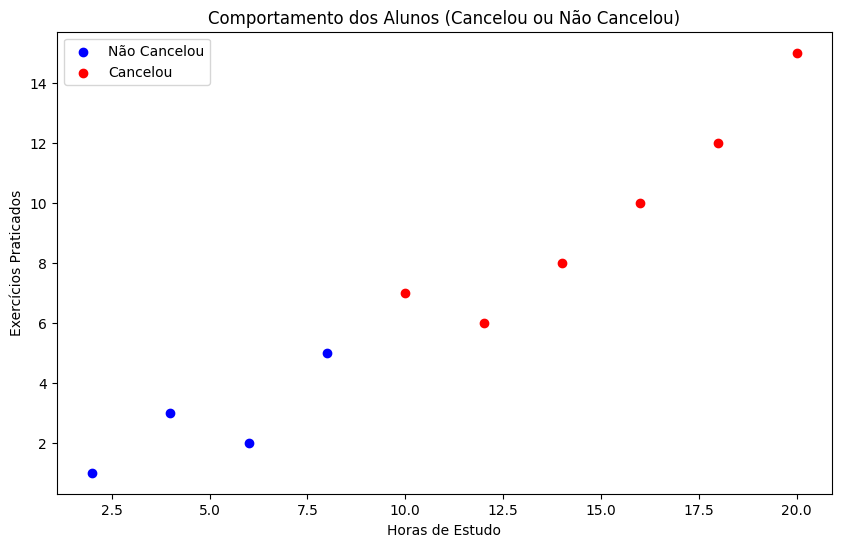

In [11]:
# Separar os dados por classe (cancelou e não cancelou)
dados_cancelou = np.column_stack((horas_estudo[cancelou_inscricao == 1], exercicios_praticados[cancelou_inscricao == 1]))
dados_nao_cancelou = np.column_stack((horas_estudo[cancelou_inscricao == 0], exercicios_praticados[cancelou_inscricao == 0]))

# Plotar os gráficos de dispersão
plt.figure(figsize=(10, 6))
plt.scatter(dados_nao_cancelou[:, 0], dados_nao_cancelou[:, 1], c='blue', label='Não Cancelou')
plt.scatter(dados_cancelou[:, 0], dados_cancelou[:, 1], c='red', label='Cancelou')
plt.xlabel('Horas de Estudo')
plt.ylabel('Exercícios Praticados')
plt.title('Comportamento dos Alunos (Cancelou ou Não Cancelou)')
plt.legend()
plt.show()